In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import os

In [5]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this

In [6]:
#doc1 = "Sugar is bad to consume. My sister likes to have sugar, but not my father."
#doc2 = "My father spends a lot of time driving my sister around to dance practice."
#doc3 = "Doctors suggest that driving may cause increased stress and blood pressure."
#doc4 = "Sometimes I feel pressure to perform well at school, but my father never seems to drive my sister to do better."
#doc5 = "Health experts say that Sugar is not good for your lifestyle."
#doc_complete = [doc1, doc2, doc3, doc4, doc5]

In [7]:
import codecs
path = "../src/data/corpus"
doc_complete = []
for i in os.listdir(path):
    if i.endswith('.txt'):
        with codecs.open(path+"/"+i, 'r', encoding='utf-8',errors='ignore') as f:
            doc_complete.append(f.read())

In [8]:
##Clean
#import nltk
#nltk.download('stopwords')
#nltk.download('wordnet')

from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete] 

In [9]:
# Importing Gensim
import gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

/usr/local/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [10]:
#[[(dictionary[id], freq) for id, freq in cp] for cp in doc_term_matrix[:1]]

In [11]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

In [12]:
#pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)

In [69]:
all_topics = ldamodel.get_document_topics(doc_term_matrix, minimum_probability=0, per_word_topics=True)
tab_doc_topics = []
for doc_topics, word_topics, phi_values in all_topics:
    list_dt = [] 
    for dt in doc_topics:
        list_dt.append(dt[1])
    tab_doc_topics.append(list_dt)

In [70]:
#
#
# NOW We try to Plot

In [71]:
print(tab_doc_topics)

[[8.391133e-06, 2.7054357e-06, 6.226096e-06, 1.252025e-05, 0.99997014], [8.357847e-06, 2.6947037e-06, 0.999966, 1.2470584e-05, 1.0460682e-05], [0.18465318, 0.101675004, 0.17242107, 0.38010597, 0.16114473], [6.0804277e-06, 0.9999727, 4.5115876e-06, 9.072491e-06, 7.610264e-06], [0.9999692, 2.6057721e-06, 5.9967374e-06, 1.2059025e-05, 1.0115455e-05], [5.9022286e-06, 1.9029729e-06, 4.379366e-06, 0.99998045, 7.3872297e-06], [6.354522e-05, 2.0487998e-05, 0.18566744, 0.78323954, 0.03100895], [0.99997264, 2.317515e-06, 5.333364e-06, 1.0725026e-05, 8.996458e-06], [7.804563e-06, 2.516316e-06, 5.79087e-06, 0.99997413, 9.768191e-06], [1.3820814e-05, 4.456052e-06, 1.0254839e-05, 2.0621772e-05, 0.9999509]]


In [78]:
arr_doc_topics = np.array(tab_doc_topics)
N, K = arr_doc_topics.shape

In [ ]:
import matplotlib.pyplot as plt
ind = np.arange(N)  # points on the x-axis
width = 0.5
plt.bar(ind, arr_doc_topics[:,0], width=width)

import numpy as np
import matplotlib.pyplot as plt

doctopic = np.array(tab_doc_topics)
N, K = doctopic.shape
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

In [103]:
print(doctopic)

[[8.39113272e-06 2.70543569e-06 6.22609605e-06 1.25202496e-05
  9.99970138e-01]
 [8.35784704e-06 2.69470365e-06 9.99966025e-01 1.24705839e-05
  1.04606816e-05]
 [1.84653178e-01 1.01675004e-01 1.72421068e-01 3.80105972e-01
  1.61144733e-01]
 [6.08042774e-06 9.99972701e-01 4.51158758e-06 9.07249068e-06
  7.61026422e-06]
 [9.99969184e-01 2.60577212e-06 5.99673740e-06 1.20590248e-05
  1.01154546e-05]
 [5.90222862e-06 1.90297294e-06 4.37936615e-06 9.99980450e-01
  7.38722974e-06]
 [6.35452234e-05 2.04879980e-05 1.85667440e-01 7.83239543e-01
  3.10089495e-02]
 [9.99972641e-01 2.31751505e-06 5.33336379e-06 1.07250262e-05
  8.99645784e-06]
 [7.80456321e-06 2.51631604e-06 5.79087009e-06 9.99974132e-01
  9.76819138e-06]
 [1.38208143e-05 4.45605201e-06 1.02548393e-05 2.06217719e-05
  9.99950886e-01]]


In [112]:
org_doctopic = [['0.0110743875','0.9889256'],['0.9998895','0.00011049763'],['0.99985886','0.00014116356'],['0.00015239419','0.9998476'],['0.99986386','0.00013612722']]

doctopic = []
for row in org_doctopic:
    normalize_row = [float(cell) for cell in row]
    doctopic.append(normalize_row)

doctopic = np.array(doctopic)

In [114]:
doctopic

array([[1.10743875e-02, 9.88925600e-01],
       [9.99889500e-01, 1.10497630e-04],
       [9.99858860e-01, 1.41163560e-04],
       [1.52394190e-04, 9.99847600e-01],
       [9.99863860e-01, 1.36127220e-04]])

ValueError: shape mismatch: objects cannot be broadcast to a single shape

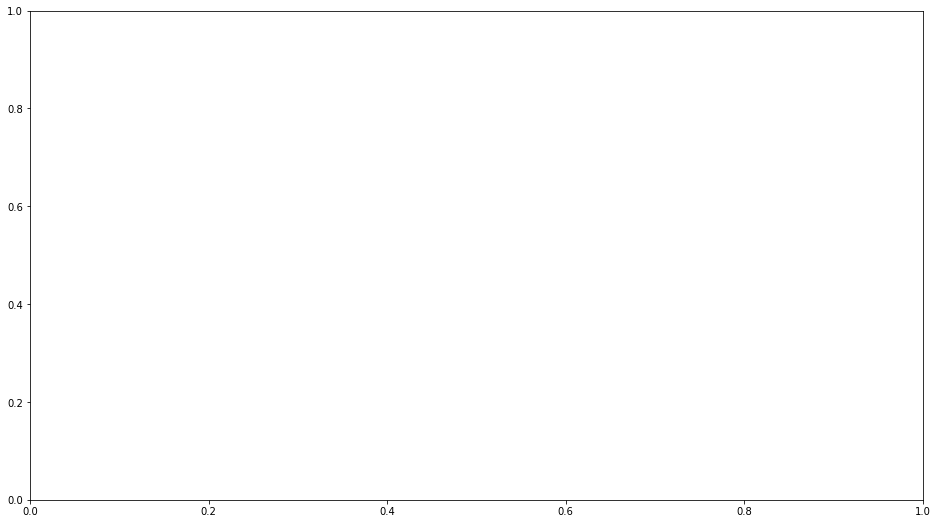

In [113]:
for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, doctopic[:, k], width, color=color)
    else:
        p = plt.bar(ind, doctopic[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += doctopic[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1

plt.ylabel('Topics')


plt.title('Topics in novels')

plt.xticks(ind+width/2, docnames)
plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]

# see http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend for details
# on making a legend in matplotlib
plt.legend([p[0] for p in plots], topic_labels)
plt.savefig('fig1.png', dpi = 300)

<Figure size 1152x648 with 0 Axes>